In [1]:
import os

import cv2
import imgviz
import pyvips
import numpy as np
import matplotlib.pyplot as plt
from empatches import EMPatches

In [2]:
data_dir = os.path.join("..", "data", "images")
image_names = os.listdir(data_dir)

print("num images:", len(image_names))

num images: 127


In [3]:
image_paths = [os.path.join(data_dir, i) for i in image_names]

In [4]:
slide = pyvips.Image.new_from_file(image_paths[0])

In [5]:
wsi = slide.numpy()

wsi.shape

(23663, 21566, 3)

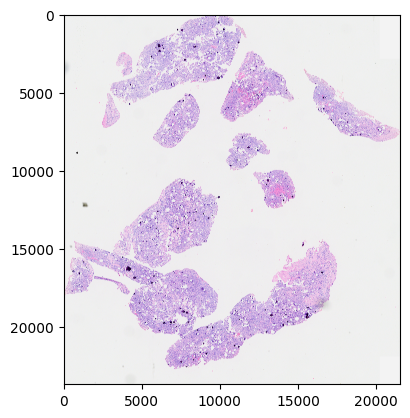

In [6]:
plt.imshow(wsi)
plt.show()

In [7]:
emp = EMPatches()
image_patches, indices = emp.extract_patches(wsi, patchsize=224, overlap=0)

In [8]:
type(image_patches[0])

numpy.ndarray

In [9]:
indices

[(0, 224, 0, 224),
 (224, 448, 0, 224),
 (448, 672, 0, 224),
 (672, 896, 0, 224),
 (896, 1120, 0, 224),
 (1120, 1344, 0, 224),
 (1344, 1568, 0, 224),
 (1568, 1792, 0, 224),
 (1792, 2016, 0, 224),
 (2016, 2240, 0, 224),
 (2240, 2464, 0, 224),
 (2464, 2688, 0, 224),
 (2688, 2912, 0, 224),
 (2912, 3136, 0, 224),
 (3136, 3360, 0, 224),
 (3360, 3584, 0, 224),
 (3584, 3808, 0, 224),
 (3808, 4032, 0, 224),
 (4032, 4256, 0, 224),
 (4256, 4480, 0, 224),
 (4480, 4704, 0, 224),
 (4704, 4928, 0, 224),
 (4928, 5152, 0, 224),
 (5152, 5376, 0, 224),
 (5376, 5600, 0, 224),
 (5600, 5824, 0, 224),
 (5824, 6048, 0, 224),
 (6048, 6272, 0, 224),
 (6272, 6496, 0, 224),
 (6496, 6720, 0, 224),
 (6720, 6944, 0, 224),
 (6944, 7168, 0, 224),
 (7168, 7392, 0, 224),
 (7392, 7616, 0, 224),
 (7616, 7840, 0, 224),
 (7840, 8064, 0, 224),
 (8064, 8288, 0, 224),
 (8288, 8512, 0, 224),
 (8512, 8736, 0, 224),
 (8736, 8960, 0, 224),
 (8960, 9184, 0, 224),
 (9184, 9408, 0, 224),
 (9408, 9632, 0, 224),
 (9632, 9856, 0, 224),

In [10]:
type(wsi)

numpy.ndarray

/var/folders/px/_hyh_81j2wx_d8kw_xzcl9hr0000gn/T/ipykernel_80607/2807534314.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


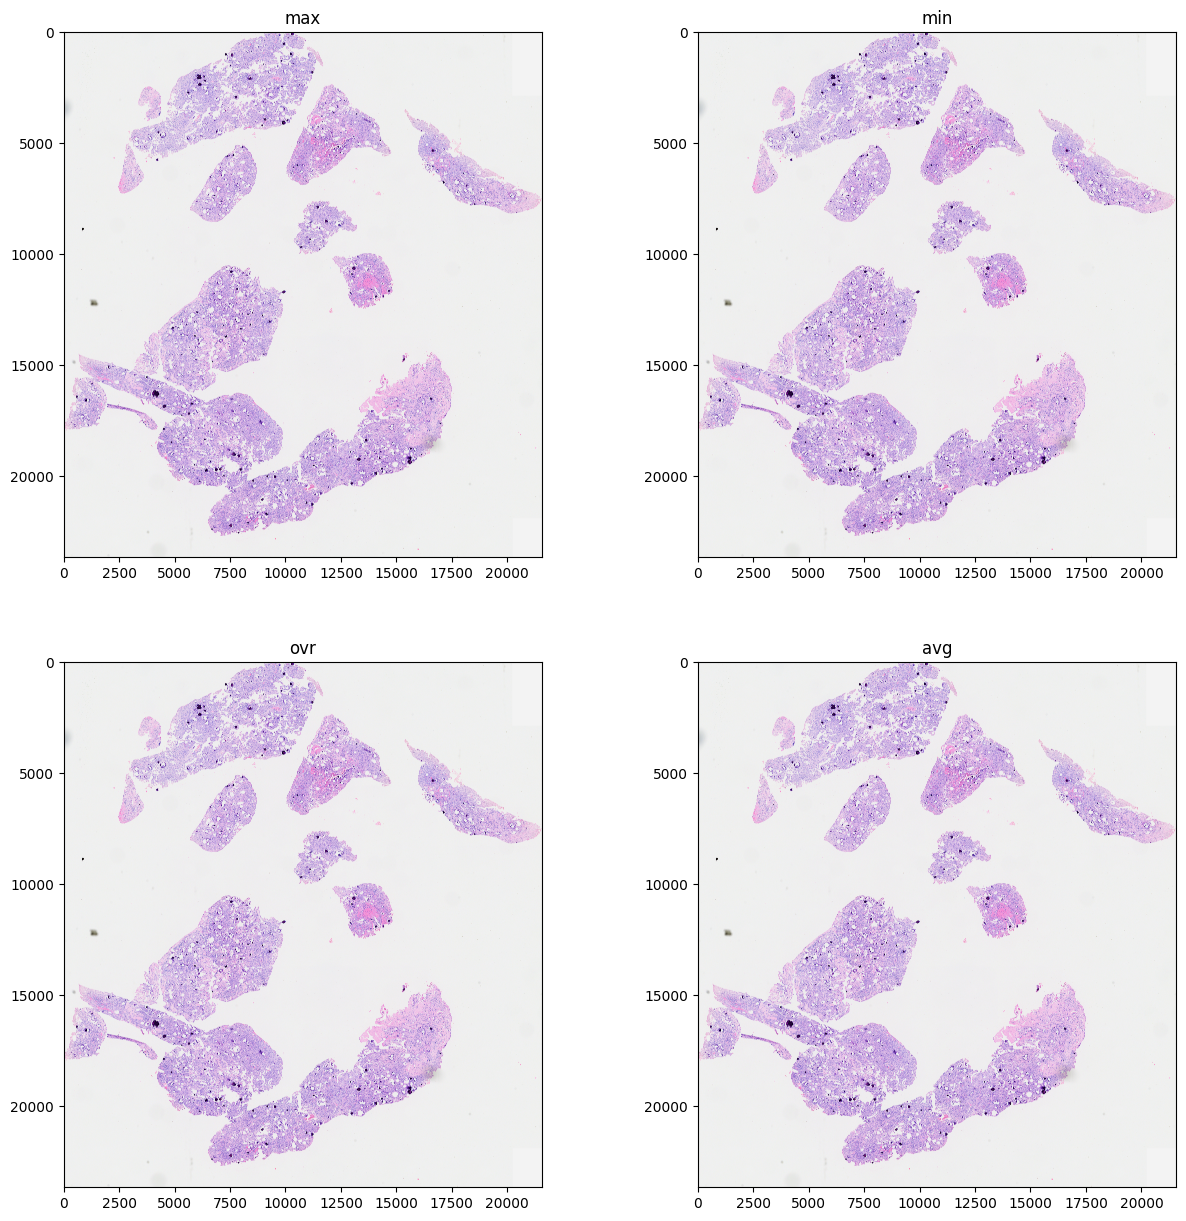

In [11]:
merged_max = emp.merge_patches(image_patches, indices, mode='max').astype(int)
merged_min = emp.merge_patches(image_patches, indices, mode='min').astype(int)
merged_ovr = emp.merge_patches(image_patches, indices, mode='overwrite').astype(int)
merged_avg = emp.merge_patches(image_patches, indices, mode='avg').astype(int)

fig, axes = plt.subplots(2, 2, figsize=(5*3, 5*3))

axes[0][0].imshow(merged_max)
axes[0][0].set_title("max")

axes[0][1].imshow(merged_min)
axes[0][1].set_title("min")

axes[1][0].imshow(merged_ovr)
axes[1][0].set_title("ovr")

axes[1][1].imshow(merged_avg)
axes[1][1].set_title("avg")

fig.show()

In [12]:
print(np.array_equal(merged_avg, wsi))
print(np.array_equal(merged_min, wsi))
print(np.array_equal(merged_max, wsi))
print(np.array_equal(merged_ovr, wsi))

True
True
True
True


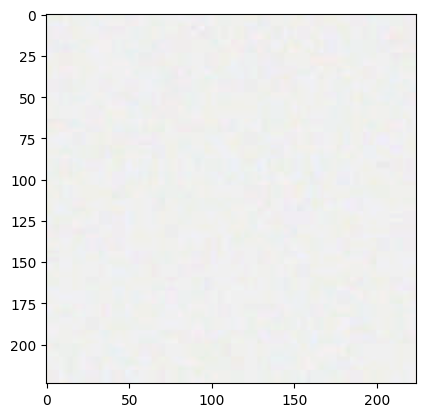

In [13]:
plt.imshow(image_patches[505])
plt.show()

In [14]:
len(image_patches)

10282

In [15]:
merged_avg.shape

(23663, 21566, 3)

In [16]:
indices[0]

(0, 224, 0, 224)

In [17]:
indices[1]

(224, 448, 0, 224)

In [18]:
new_size = (32, 32)
resized_image_patches = [cv2.resize(image, new_size) for image in image_patches]

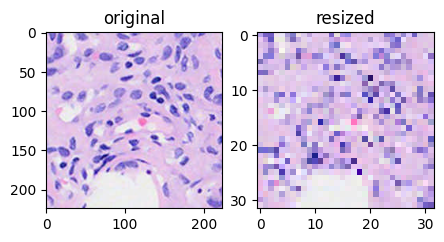

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(5,10))

axes[0].imshow(image_patches[500])
axes[0].set_title("original")

axes[1].imshow(resized_image_patches[500])
axes[1].set_title("resized")

plt.show()

In [20]:
def get_checkpoint(indices):
    for i, index in enumerate(indices):
        if index[2] != 0:
            checkpoint = i
            
            return checkpoint

In [21]:
checkpoint = 0
for i, index in enumerate(indices):
    if index[2] != checkpoint:
        print(i, index)
        checkpoint = index[2]

106 (0, 224, 224, 448)
212 (0, 224, 448, 672)
318 (0, 224, 672, 896)
424 (0, 224, 896, 1120)
530 (0, 224, 1120, 1344)
636 (0, 224, 1344, 1568)
742 (0, 224, 1568, 1792)
848 (0, 224, 1792, 2016)
954 (0, 224, 2016, 2240)
1060 (0, 224, 2240, 2464)
1166 (0, 224, 2464, 2688)
1272 (0, 224, 2688, 2912)
1378 (0, 224, 2912, 3136)
1484 (0, 224, 3136, 3360)
1590 (0, 224, 3360, 3584)
1696 (0, 224, 3584, 3808)
1802 (0, 224, 3808, 4032)
1908 (0, 224, 4032, 4256)
2014 (0, 224, 4256, 4480)
2120 (0, 224, 4480, 4704)
2226 (0, 224, 4704, 4928)
2332 (0, 224, 4928, 5152)
2438 (0, 224, 5152, 5376)
2544 (0, 224, 5376, 5600)
2650 (0, 224, 5600, 5824)
2756 (0, 224, 5824, 6048)
2862 (0, 224, 6048, 6272)
2968 (0, 224, 6272, 6496)
3074 (0, 224, 6496, 6720)
3180 (0, 224, 6720, 6944)
3286 (0, 224, 6944, 7168)
3392 (0, 224, 7168, 7392)
3498 (0, 224, 7392, 7616)
3604 (0, 224, 7616, 7840)
3710 (0, 224, 7840, 8064)
3816 (0, 224, 8064, 8288)
3922 (0, 224, 8288, 8512)
4028 (0, 224, 8512, 8736)
4134 (0, 224, 8736, 8960)
42

In [22]:
get_checkpoint(indices)

106

In [23]:
def adjust_indices(indices, new_size):
    checkpoint = get_checkpoint(indices)
    placeholder = [0, new_size, 0, new_size]
    new_indices = []

    for i in range(len(indices)):
        if i % checkpoint == 0 and i > 0:
            placeholder[0] = 0
            placeholder[1] = new_size

            placeholder[2] += new_size
            placeholder[3] += new_size

        y1, y2, = placeholder[0], placeholder[1]
        x1, x2 = placeholder[2], placeholder[3]
        new_indices.append((y1, y2, x1, x2))

        placeholder[0] += new_size
        placeholder[1] += new_size

    return new_indices

In [24]:
new_indices = adjust_indices(indices, new_size[0])

In [25]:
checkpoint = 0
for i, index in enumerate(new_indices):
    if index[2] != checkpoint:
        print(i, index)
        checkpoint = index[2]

106 (0, 32, 32, 64)
212 (0, 32, 64, 96)
318 (0, 32, 96, 128)
424 (0, 32, 128, 160)
530 (0, 32, 160, 192)
636 (0, 32, 192, 224)
742 (0, 32, 224, 256)
848 (0, 32, 256, 288)
954 (0, 32, 288, 320)
1060 (0, 32, 320, 352)
1166 (0, 32, 352, 384)
1272 (0, 32, 384, 416)
1378 (0, 32, 416, 448)
1484 (0, 32, 448, 480)
1590 (0, 32, 480, 512)
1696 (0, 32, 512, 544)
1802 (0, 32, 544, 576)
1908 (0, 32, 576, 608)
2014 (0, 32, 608, 640)
2120 (0, 32, 640, 672)
2226 (0, 32, 672, 704)
2332 (0, 32, 704, 736)
2438 (0, 32, 736, 768)
2544 (0, 32, 768, 800)
2650 (0, 32, 800, 832)
2756 (0, 32, 832, 864)
2862 (0, 32, 864, 896)
2968 (0, 32, 896, 928)
3074 (0, 32, 928, 960)
3180 (0, 32, 960, 992)
3286 (0, 32, 992, 1024)
3392 (0, 32, 1024, 1056)
3498 (0, 32, 1056, 1088)
3604 (0, 32, 1088, 1120)
3710 (0, 32, 1120, 1152)
3816 (0, 32, 1152, 1184)
3922 (0, 32, 1184, 1216)
4028 (0, 32, 1216, 1248)
4134 (0, 32, 1248, 1280)
4240 (0, 32, 1280, 1312)
4346 (0, 32, 1312, 1344)
4452 (0, 32, 1344, 1376)
4558 (0, 32, 1376, 1408)


In [26]:
new_merged_max = emp.merge_patches(resized_image_patches, new_indices, mode='max').astype("uint8")

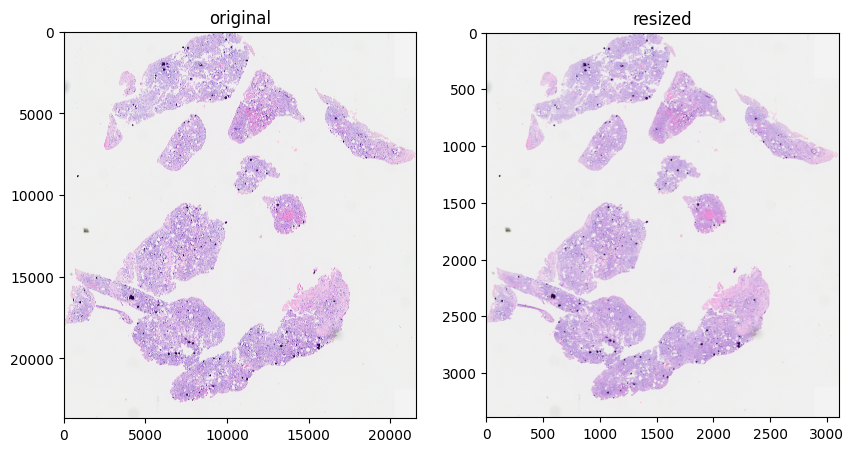

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(10,20))

axes[0].imshow(merged_max)
axes[0].set_title("original")

axes[1].imshow(new_merged_max)
axes[1].set_title("resized")

plt.show()

In [28]:
new_merged_max.shape

(3392, 3104, 3)

In [29]:
plt.imsave("test.png", new_merged_max)